In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_ind, shapiro, f_oneway, mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest

In [23]:
df = pd.read_csv('data/kagle_medical_appointment_no_shows.zip')

In [24]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


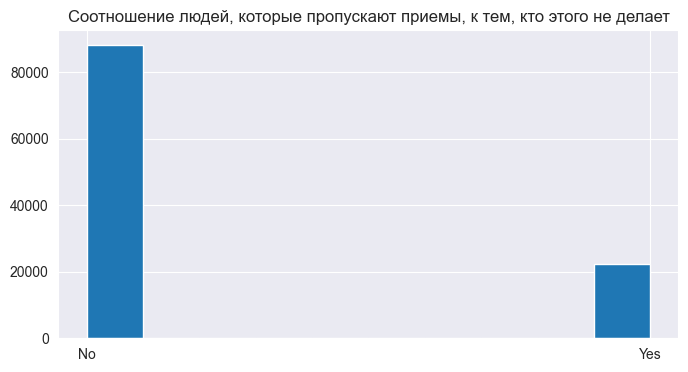

In [26]:
plt.figure(figsize=(8,4))
df['No-show'].hist()
plt.title('Соотношение людей, которые пропускают приемы, к тем, кто этого не делает');

In [27]:
df['No-show'].value_counts(True)

No     0.798067
Yes    0.201933
Name: No-show, dtype: float64

In [28]:
df[df['No-show']=='Yes']['Gender'].value_counts(True)

F    0.653882
M    0.346118
Name: Gender, dtype: float64

In [29]:
categorical_columns_names = ['Gender', 'Neighbourhood']
encoded_columns = pd.get_dummies(df, columns = categorical_columns_names)

In [30]:
encoded_columns

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
0,2.987250e+13,5642903,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.589978e+14,5642503,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.262962e+12,5642549,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.679512e+11,5642828,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.841186e+12,5642494,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110523,3.596266e+12,5650093,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110524,1.557663e+13,5630692,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110525,9.213493e+13,5630323,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
encoded_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 95 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   PatientId                                  110527 non-null  float64
 1   AppointmentID                              110527 non-null  int64  
 2   ScheduledDay                               110527 non-null  object 
 3   AppointmentDay                             110527 non-null  object 
 4   Age                                        110527 non-null  int64  
 5   Scholarship                                110527 non-null  int64  
 6   Hipertension                               110527 non-null  int64  
 7   Diabetes                                   110527 non-null  int64  
 8   Alcoholism                                 110527 non-null  int64  
 9   Handcap                                    110527 non-null  int64  
 10  SMS_rece

In [32]:
import logging
logging.debug('Это сообщение отладки')
logging.info('Это информационное сообщение')
logging.warning('Это сообщение-предупреждение')
logging.error('Это сообщение об ошибке')
logging.critical('Это критическое сообщение')

ERROR:root:Это сообщение об ошибке
CRITICAL:root:Это критическое сообщение


In [33]:
logging.basicConfig(level=logging.DEBUG)
logging.debug('Сообщение будет залогировано!')

In [34]:
# Функция для создания лог-файла и записи в него информации
def get_logger(path, file):
    """[Создает лог-файл для логирования в него]
    Аргументы:
        path {string} -- путь к директории
        file {string} -- имя файла
     Возвращает:
        [obj] -- [логер]
    """
    # проверяем, существует ли файл
    log_file = os.path.join(path, file)

    #если  файла нет, создаем его
    if not os.path.isfile(log_file):
        open(log_file, "w+").close()

    # поменяем формат логирования
    file_logging_format = "%(levelname)s: %(asctime)s: %(message)s"

    # конфигурируем лог-файл
    logging.basicConfig(level=logging.INFO,
                        format = file_logging_format)
    logger = logging.getLogger()

    # создадим хэнлдер для записи лога в файл
    handler = logging.FileHandler(log_file)

    # установим уровень логирования
    handler.setLevel(logging.INFO)

    # создадим формат логирования, используя file_logging_format
    formatter = logging.Formatter(file_logging_format)
    handler.setFormatter(formatter)

    # добавим хэндлер лог-файлу
    logger.addHandler(handler)
    return logger

In [35]:
!mkdir logs

A subdirectory or file logs already exists.


In [36]:
import os
# создаем лог-файл
logger = get_logger(path="logs/", file="data.logs")

logger.info("Data")

logger.info("Data shape {}".format(df.shape))

logger.info("Percentage of women: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]))

logger.info("Percentage of men: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[1]))

In [37]:
if df.shape != (110526,14):
    logger.error('Data shape is incorrect!')

ERROR:root:Data shape is incorrect!


In [38]:
from comet_ml import Experiment

# Создайте эксперимент с помощью вашего API ключа
experiment = Experiment(
    api_key='jEudH2RAVmoOiPgRUdiRT2V6z',
    project_name='medical-appointment',
    workspace='slagovskiy',
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/slagovskiy/medical-appointment/5d0b15eb701c46bf9458f2bcaaa9c71c



In [39]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/slagovskiy/medical-appointment/5d0b15eb701c46bf9458f2bcaaa9c71c
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (8.02 MB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: ---------------------------
COMET INFO: Uploading metrics, params, and assets to Comet before program termination (may take several seconds)
COMET INFO: The Python SDK has 3600 seconds to finish before aborting...
COMET INFO: Waiting for completion of the file uploads (may take several seconds)
COMET INFO: The Python SDK has 10800